In [ ]:
!pip install groq

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from groq import Groq
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Streaming output truncated to the last 5000 lines.
Input token length: 89
Output Response: POS

Explanation: The text expresses admiration for good movies and actors, implying a positive sentiment.
Text: Pani kattukoni manchi cinemalu Anni reject chesav kadhanna 🤦‍♂ Vati place lo 90mm lu thagilaiii PawanKalyan
Predicted Sentiment: POS
Actual Sentiment: POS
--------------------------------------------------
Input token length: 82
Output Response: NEG
Text: Ravi anna fans   🔥 is back tq bro 💙
Predicted Sentiment: NEG
Actual Sentiment: POS
--------------------------------------------------
Input token length: 95
Output Response: NEG 

Explanation: 
The user says "Two movie reviews within two hours " which suggests something accomplished, but they say " me oopika ki Me interest ki Me dedication" in a negative light. "me oopika" is likely a misquote of 'excessive' because they say after that dedication, they exclaim "TAKE A BOW" in a sarcastic tone and with the emoji 🙏. This indicate the cl

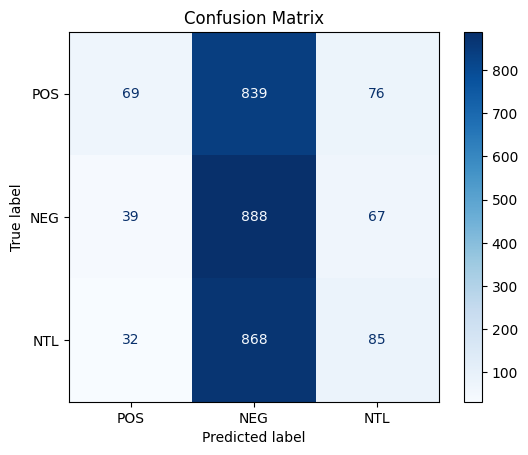

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from groq import Groq
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Here, I load the dataset
test_df = pd.read_excel("/content/test_set(1).xlsx", usecols=["Label", "Text"]).head(3000)

# Here, I am setting api client
client = Groq(api_key="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")

# Here i created the list to strore the labels
actual_labels = []
predicted_labels = []

# Here, I am doing label mapping
label_map = {"positive": "POS", "pos": "POS", "negative": "NEG", "neg": "NEG", "neutral": "NTL", "ntl": "NTL"}

# These are code mix Few-shot examples
few_shot_examples = """
Text: "Gurthunchukone prema kada   nice movie  actors acted well in their roles"
Sentiment: POS

Text: "Vishal new movie review kavali bro"
Sentiment: NTL

Text: "Worst government. YSRCP chala chethha ga paripalana chesthumdhi."
Sentiment: NEG
"""

def get_sentiment_prediction(text):
    prompt = f"""Analyze the sentiment of the following text and classify it as 'POS' (Positive), 'NEG' (Negative), or 'NTL' (Neutral),
                Provide only 'POS', 'NEG', or 'NTL' on the first line.
                Use the examples below for reference to classify the claims:{few_shot_examples} Text: "{text}"Sentiment: """

    print(f"Input token length: {len(prompt.split())}")
    try:
        response = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model="llama-3.1-8b-instant",
            max_tokens=500,
        )
        output_text = response.choices[0].message.content.strip()
        print(f"Output Response: {output_text}")

        # Here I extract the predicted label
        predicted_label = extract_predicted_label(output_text)
        return predicted_label

    except Exception as e:
        print(f"Error processing text '{text}': {e}")
        return ""

def extract_predicted_label(output_text):
    predicted_result = output_text.splitlines()
    predicted_label = predicted_result[0].strip(' .,*').lower()

    if predicted_label in label_map:
        predicted_label = label_map[predicted_label]

    return predicted_label

# Here, I am processing the codemix data
for index, row in test_df.iterrows():
    text_content = row['Text']
    true_label = row['Label'].strip().upper()

    classified_label = get_sentiment_prediction(text_content)

    if classified_label == "":
        continue

    actual_labels.append(true_label)
    predicted_labels.append(classified_label)

    print(f"Text: {text_content}")
    print(f"Predicted Sentiment: {classified_label}")
    print(f"Actual Sentiment: {true_label}")
    print('-' * 50)

# Here , i am calculating total predictions
total_predictions = len(actual_labels)
print(f"\nTotal predictions made: {total_predictions}")

# Here, I am counting correct matches
correct_matches = 0
for true_label, predicted_label in zip(actual_labels, predicted_labels):
    if true_label == predicted_label:
        correct_matches += 1

print(f"Number of correct classifications: {correct_matches}")

# Here, I am calculating accuracy in percentage
if total_predictions > 0:
    accuracy_percentage = (correct_matches / total_predictions) * 100
else:
    accuracy_percentage = 0



print(f"Successful Predictions: {total_predictions}")
print(f"Correct Classifications: {correct_matches}")
print(f"Model Accuracy: {accuracy_percentage:.2f}%")
print("=" * 50)


print("\nDetailed Classification Report:")
print(classification_report(actual_labels, predicted_labels, labels=["POS", "NEG", "NTL"]))

sentiment_labels = ["POS", "NEG", "NTL"]
confusion_matrix = confusion_matrix(actual_labels, predicted_labels, labels=sentiment_labels)

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=sentiment_labels)
display.plot(cmap=plt.cm.Blues)
plt.title("Sentiment Analysis Confusion Matrix")
plt.show()